ОШИБКИ I И II РОДА С ТОЧКИ ЗРЕНИЯ КЛАССИФИКАЦИИ

Давайте рассмотрим предсказания алгоритма  на конкретном объекте  под номером из данных  с точки зрения статистических гипотез.

Будем считать класс 1 (диабет есть) положительным исходом (Positive), а класс 0 (диабета нет) — отрицательным (Negative).

Примечание. На первый взгляд такая терминология может показаться не совсем этичной, так как наличие диабета — это всё-таки отрицательный сценарий для пациента. Однако для унификации терминологии в машинном обучении в большинстве задач объекты класса 1 считаются объектами с наличием некоторого эффекта (болезнь есть / задолженность погашена / клиент ушёл / устройство отказало и т. д.), а объекты класса 0 — объектами с отсутствием этого эффекта (болезни нет / задолженность не погашена / клиент не ушёл / устройство работает без отказов и т. д.).

Пусть у нас есть некоторый пациент , и мы хотим понять, болен ли он диабетом. С точки зрения задачи классификации мы хотим предсказать истинный класс () пациента.

Нулевая гипотеза будет состоять в отсутствии эффекта (пациент не болен диабетом), то есть , а альтернативная — в его наличии (пациент болен диабетом) , то есть . В терминах статистических гипотез это будет записано так:

- :H0 Пациент  не болеет диабетом .
- :H1 Пациент  болеет диабетом .
Тогда у нас есть два случая, в которых мы можем допустить ошибку:

Ошибка I (первого) рода (a-ошибка): отклонение нулевой гипотезы, когда она на самом деле верна, или ложноположительный результат. То есть мы предсказали, что пациент болен диабетом, хотя это не так.

Ошибка II (второго) рода (n-ошибка): принятие нулевой гипотезы, когда она на самом деле ложна, или ложноотрицательный результат. То есть мы предсказали, что пациент здоров, хотя на самом деле он болен диабетом.

#### 1Матрица ошибок (confusion matrix) показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта к одному из классов. Тогда каждая ячейка матрицы ошибок соответствует количеству объектов, попавших в одну из следующих четырёх категорий:

- **Истинно положительные (True Positive, TP)** — это объекты, обозначенные моделью как класс 1 (y=1) и действительно принадлежащие к классу 1 (y=1).
- **Ложноположительные (False Positive, FP)** — это объекты, обозначенные моделью как класс 1 (y=1), но в действительности принадлежащие к классу 0 (y=0). То есть это объекты, для которых модель совершила ошибку I рода.
- **Истинно отрицательные (True Negative, TN)** — это объекты, обозначенные моделью как класс 0 (y=0) и действительно принадлежащие к классу 0 (y=0).
- **Ложноотрицательные (False Negative, FN)** — это объекты, обозначенные моделью как класс 0 (y=0), но в действительности принадлежащие к классу 1 (y=1). То есть это объекты, для которых модель совершила ошибку II рода.
Общий вид матрицы ошибок будет следующим:
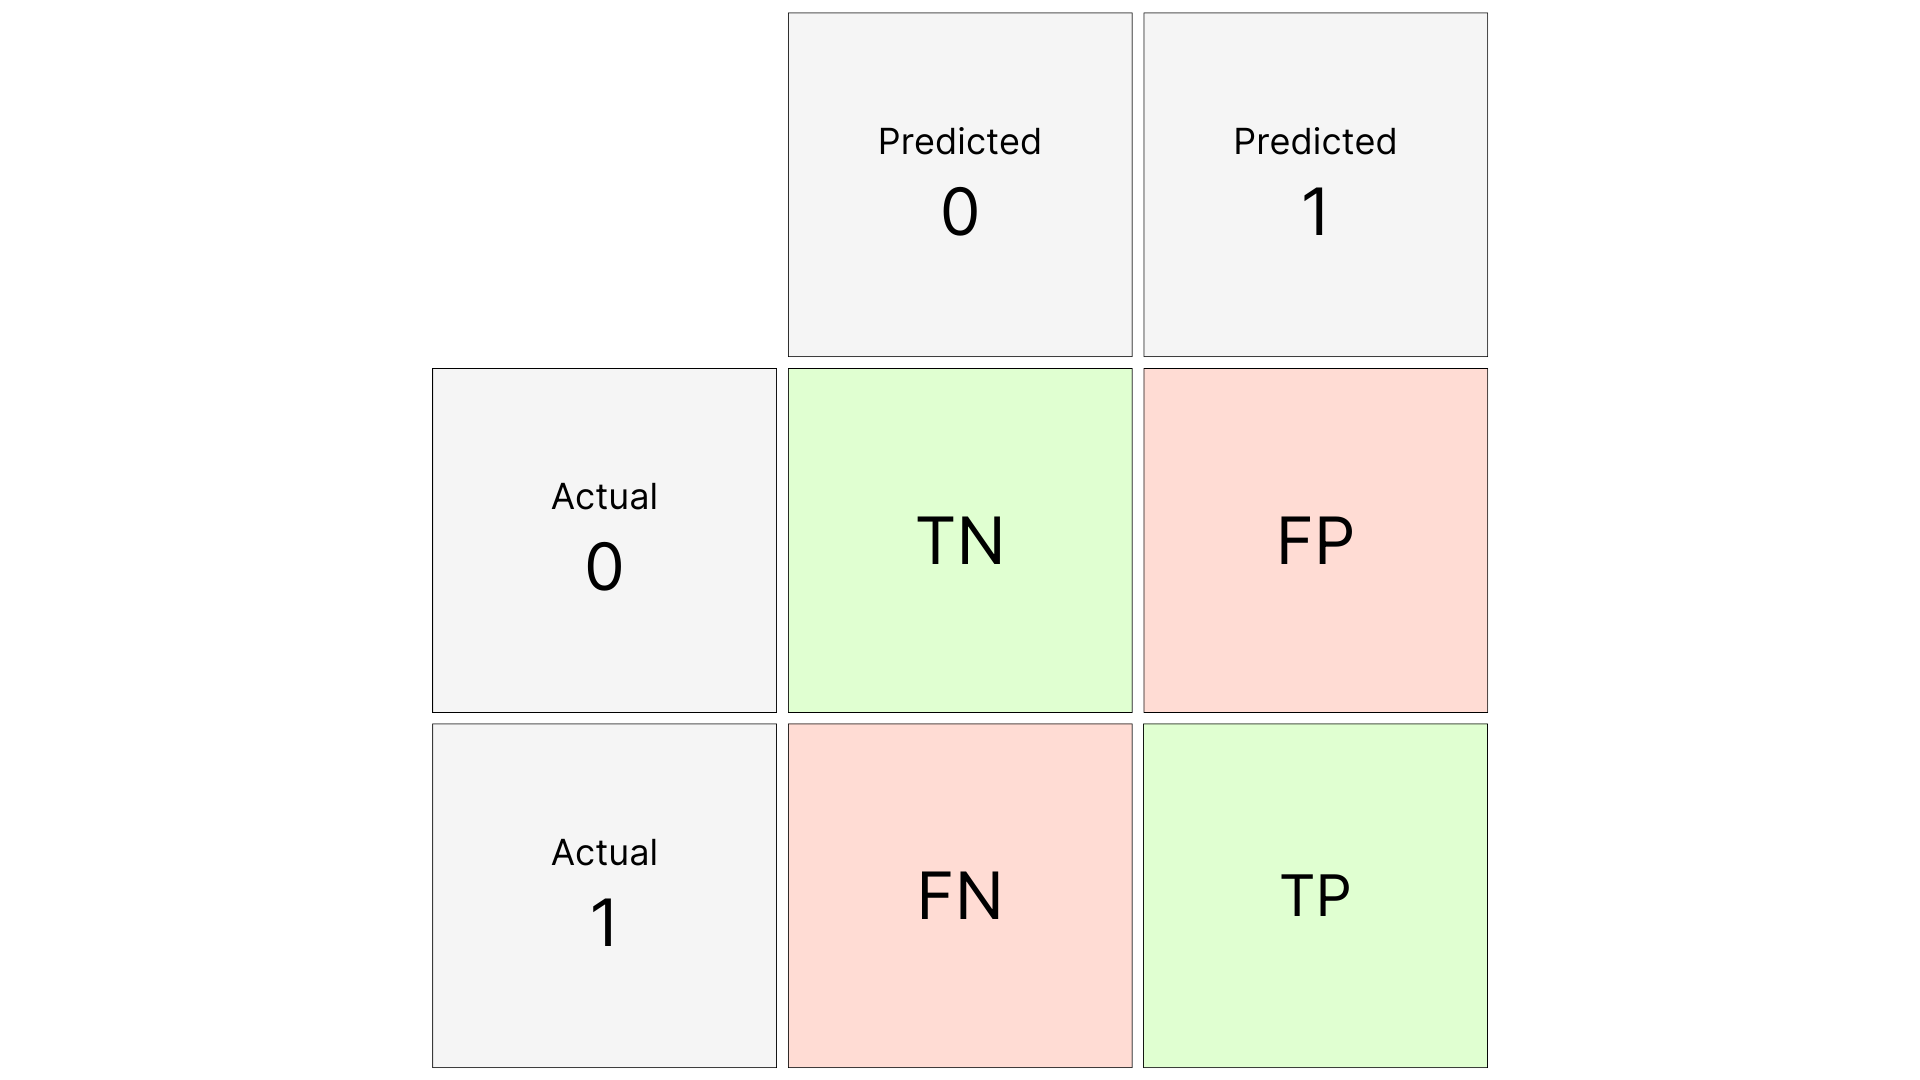

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import plotly 
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

#%matplotlib inline
#plt.style.use('seaborn')

Функции, которые нам понадобятся:

- **confusion_matrix()** — расчёт матрицы ошибок,
- **accuracy_score()** — расчёт accuracy,
- **precision_score()** — расчёт precision,
- **recall_score()** — расчёт recall,
- **f1_score()** — расчёт F1-меры.

In [31]:
diabetes_data = pd.read_csv("data/diabetes_cleaned.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [32]:
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']
from sklearn import linear_model #линейные модели

In [33]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm


w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


In [34]:
#Модель log_reg_2d:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred1)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred1)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred1)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred1)))
 
# Accuracy: 0.76
# Precision: 0.71
# Recall: 0.53
# F1 score: 0.61

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


FULL

In [35]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [36]:

#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)

In [37]:
#Делаем предсказание моделью, обученной на двух признаках 
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
#Делаем предсказание моделью, обученной на всех признаках 
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

In [38]:
#Модель log_reg_full:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred2)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))
 
# Accuracy: 0.77
# Precision: 0.72
# Recall: 0.56
# F1 score: 0.63

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


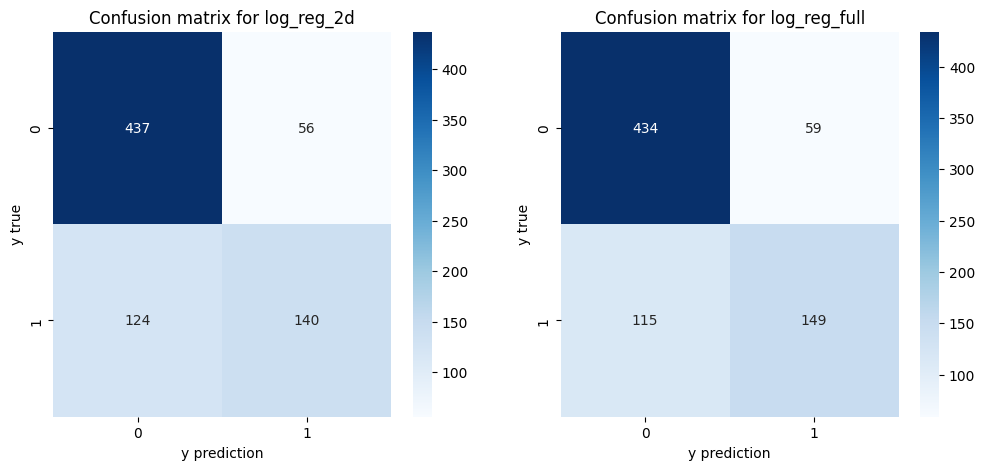

In [39]:


#Строим матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)
#Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
#Строим тепловую карту для второй матрицы ошибок
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');

In [40]:
confusion_matrix1

array([[437,  56],
       [124, 140]], dtype=int64)

In [41]:
#Для облегчения расчёта метрик можно использовать функцию classification_report() из модуля metrics. Она возвращает отчёт обо всех метриках классификации:

print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



In [42]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

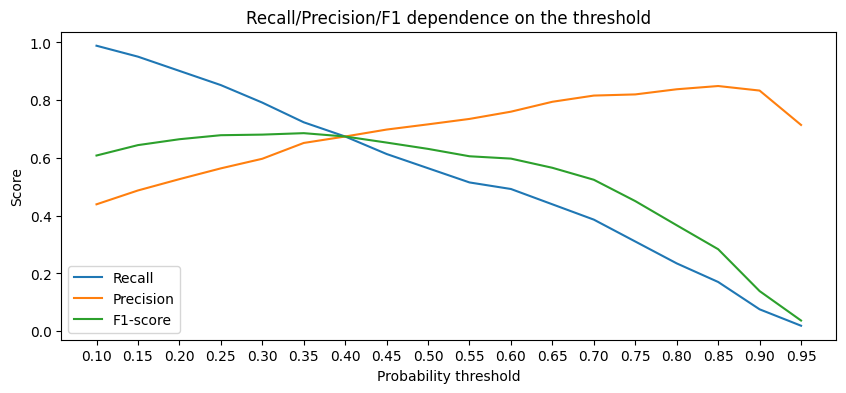

In [45]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();


In [46]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.4
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



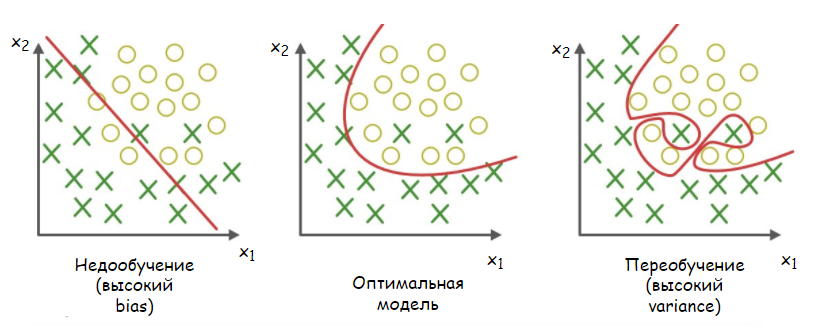
На рисунке выше изображены три различные модели:

- первая — простая логистическая регрессия;
- вторая — логистическая регрессия, обученная на полиномиальных признаках второй степени;
- третья — логистическая регрессия, обученная на полиномиальных признаках десятой степени.
Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.

In [48]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

In [50]:
#Модель log_reg_full:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_true, y_pred)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_true, y_pred)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_true, y_pred)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_true, y_pred)))

Accuracy: 0.62
Precision: 0.75
Recall: 0.60
F1 score: 0.67
